In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score

In [55]:
phenoDF = pd.read_table("pheno_matrix.txt")

# y = [int(element*1000) for element in phenoDF["YPACETATE"]]
# y = list(phenoDF["YPACETATE"])
y = list(phenoDF['YPDBENOMYL200'])

seqs = list(phenoDF["Unnamed: 0"])

# Using Embeddings' Average:

In [48]:
npzfile = np.load(f"../Model Inference/Full/Hyena/hyenadna-medium-450k-seqlen-hf.npz")

X = []

for seq in seqs:
    try:
        embedding = npzfile[seq]
        X.append(np.sum(embedding, axis=0) / len(embedding))
    except KeyError:
        embedding = npzfile[seq.lstrip("SACE_")]
        X.append(np.sum(embedding, axis=0) / len(embedding)) # since a few strain names are somehow missing the 'SACE_' prefix from the full genome embeddings set

In [49]:
npzfile = np.load(f"../Model Inference/Full/Hyena/hyenadna-medium-160k-seqlen-hf.npz")

X1 = []

for seq in seqs:
    try:
        embedding = npzfile[seq]
        X1.append(np.sum(embedding, axis=0) / len(embedding))
    except KeyError:
        embedding = npzfile[seq.lstrip("SACE_")]
        X1.append(np.sum(embedding, axis=0) / len(embedding)) # since a few strain names are somehow missing the 'SACE_' prefix from the full genome embeddings set

In [5]:
print(len(X) == len(y))

True


In [15]:
X = np.array(X)
X.shape

(971, 256)

## With RandomForest:

In [51]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
RF = RandomForestRegressor()

In [53]:
scores450RF = cross_val_score(RF, X, y, cv=5)
scores450RF

array([-0.6378985 ,  0.02369207, -0.42790956, -0.1961357 , -0.28983685])

In [54]:
scores160RF = cross_val_score(RF, X1, y, cv=5)
scores160RF

array([-0.61858975, -0.05500674, -0.32105781, -0.23478421, -0.20924817])

## With SVM:

In [65]:
from sklearn import svm
SVM = svm.SVC()

In [35]:
scores450SVM = cross_val_score(SVM, X, y, cv=5)
scores450SVM

c:\Users\Ruhaib\anaconda3\envs\eval\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.01025641, 0.00515464, 0.00515464, 0.01546392, 0.01030928])

In [37]:
scores160SVM = cross_val_score(SVM, X1, y, cv=5)
scores160SVM

c:\Users\Ruhaib\anaconda3\envs\eval\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.        , 0.00515464, 0.00515464, 0.01030928, 0.01030928])

## With LinR:

In [64]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [39]:
scores450LR = cross_val_score(LR, X, y, cv=5)
scores450LR

array([-1.40179968, -6.2492857 , -0.85793722, -0.85353208, -1.20329857])

In [40]:
scores160LR = cross_val_score(LR, X1, y, cv=5)
scores160LR

array([-1.081218  , -1.40302992, -0.71570218, -1.05345893, -1.01768947])

# Using Embeddings' Sum:

In [57]:
npzfile = np.load(f"../Model Inference/Full/Hyena/hyenadna-medium-450k-seqlen-hf.npz")

X_ = []

for seq in seqs:
    try:
        embedding = npzfile[seq]
        X_.append(np.sum(embedding, axis=0))
    except KeyError:
        embedding = npzfile[seq.lstrip("SACE_")]
        X_.append(np.sum(embedding, axis=0)) # since a few strain names are somehow missing the 'SACE_' prefix from the full genome embeddings set

In [58]:
npzfile = np.load(f"../Model Inference/Full/Hyena/hyenadna-medium-160k-seqlen-hf.npz")

X1_ = []

for seq in seqs:
    try:
        embedding = npzfile[seq]
        X1_.append(np.sum(embedding, axis=0))
    except KeyError:
        embedding = npzfile[seq.lstrip("SACE_")]
        X1_.append(np.sum(embedding, axis=0)) # since a few strain names are somehow missing the 'SACE_' prefix from the full genome embeddings set

In [59]:
scores450RF_Sum = cross_val_score(RF, X_, y, cv=5)
scores450RF_Sum

array([-0.09460869, -0.0744593 , -0.05556011, -0.16851795, -0.18971893])

In [60]:
scores160RF_Sum = cross_val_score(RF, X1_, y, cv=5)
scores160RF_Sum

array([-0.05950192, -0.03359265, -0.0427862 , -0.13746747, -0.21976269])

# Single Gene Trials:

In [74]:
with open('../Model Inference/Embeddings/YAL007C/hyenadna-medium-450k-seqlen-hf.txt', 'r+') as f:
    singleGene = eval(f.read())

embeddingsSingle = np.asarray([element['embedding'] for element in singleGene][:971])

In [63]:
print(len(embeddingsSingle) == len(y))

True


In [75]:
scores450RFSingle = cross_val_score(RF, embeddingsSingle, y, cv=5)
scores450RFSingle

array([-0.06241806, -0.20893366, -0.03256559, -0.19607821, -0.0868113 ])

In [68]:
score1mRF = cross_val_score(RF, embeddingsSingle, y, cv=5)

In [70]:
score1mRF

array([-0.04897535, -0.17931478, -0.06889755, -0.20531716, -0.08206305])

## Overall results:

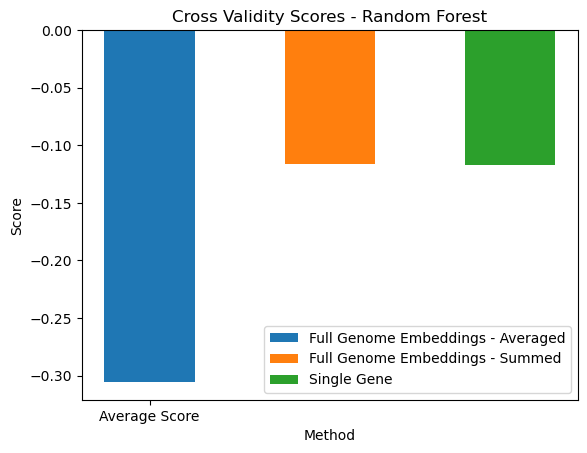

In [96]:
import matplotlib.pyplot as plt

X_axis = np.arange(1)
X = ['Average Score']

plt.bar(X_axis, np.average(np.array(scores450RF)), 0.1, label = "Full Genome Embeddings - Averaged") 
plt.bar(X_axis + 0.2, np.average(np.array(scores450RF_Sum)), 0.1, label = 'Full Genome Embeddings - Summed') 
plt.bar(X_axis + 0.4, np.average(np.array(scores450RFSingle)), 0.1, label = 'Single Gene') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Method") 
plt.ylabel("Score") 
plt.title("Cross Validity Scores - Random Forest") 
plt.legend() 
plt.show() 

<ErrorbarContainer object of 3 artists>

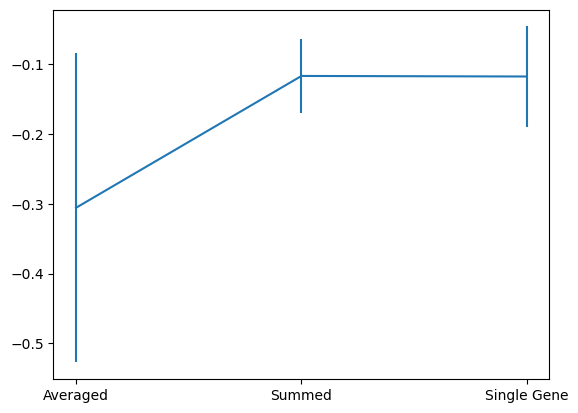

In [109]:
x = ["Averaged" ,'Summed' , 'Single Gene']
y = [np.array(scores450RF), np.array(scores450RF_Sum), np.array(scores450RFSingle)]
yAvg = [np.average(element) for element in y]
yerr = [np.std(element) for element in y]

plt.errorbar(x, yAvg, yerr)